In [139]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.integrate import solve_ivp
%matplotlib inline
import Optimisation
from importlib import reload
reload(Optimisation)
from Optimisation import *




In [140]:
LJ = LennardJones()




c:\Users\tobia\ALLE_SCRIPTS\TobiasJohannessen.github.io\Computational Physics\Exercises\Week 3\Optimisation.py:381: RuntimeWarning: invalid value encountered in scalar divide
  


(1001, 1, 2)


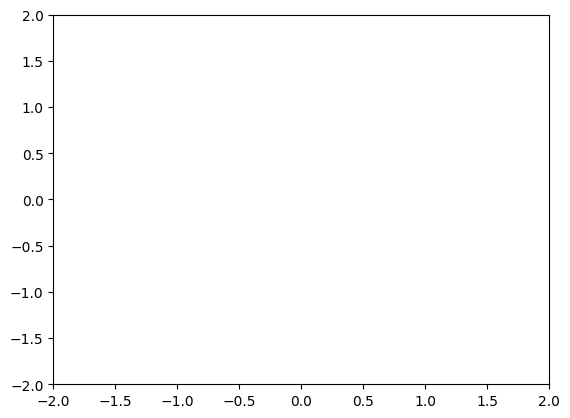

In [149]:
static_points= np.array([[-1, 0], [1,0]])
non_static_points = np.array([[-2,2]])

rs = LJ.line_search(r0 = non_static_points, static_points=static_points)

rs_list = [rs[:,i] for i in range(rs.shape[1])]

fig, ax = plt.subplots()

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

print(rs.shape)





1001


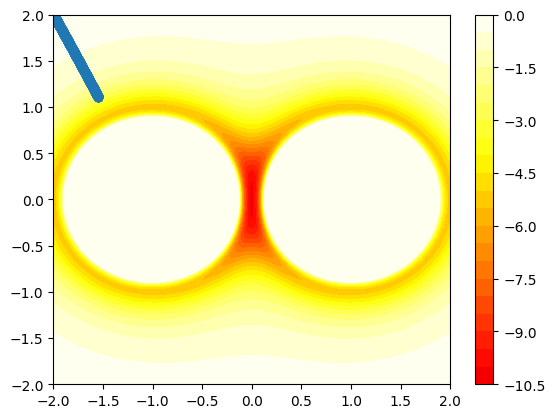

In [150]:
fig, ax = plt.subplots()

for r in rs_list:
    print(len(r[:,0]))
    ax.plot(r[:,0], r[:,1], 'o-')
    

x = np.linspace(-2,2,400)
y = np.linspace(-2,2,400)

Xs, Ys = np.meshgrid(x,y)

Zs = np.zeros_like(Xs)
for i in range(len(x)):
   for j in range(len(y)):
       Zs[i,j] = LJ.V(np.array([[Xs[i,j], Ys[i,j]], static_points[0], static_points[1]]))
       if Zs[i,j] > 0:
           Zs[i,j] = 0


contour = ax.contourf(Xs, Ys, Zs, vmin = -15.75, vmax = 0, cmap = 'hot', levels = 20, extent=[-0.5, 0.5, -0.5, 0.5]) 
plt.colorbar(contour)